In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from EDA import get_test, get_train, save_pred

In [2]:
X_train, y_train = get_train()
X_test = get_test()


In [3]:
X_train = X_train.iloc[:,:7]
X_test = X_test.iloc[:, :7]

In [4]:
print(X_train.shape)
# print(X_train.head(1))
print(X_test.shape)
print(X_test.dropna().shape)

(19168, 7)
(6966, 7)
(6966, 7)


In [5]:
# 训练随机森林解决回归问题
def random_forest_result(param_grid):
    estimator = RandomForestRegressor()
    model = GridSearchCV(estimator, param_grid, scoring="neg_root_mean_squared_error")
    # print(estimator.get_params().keys())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Best RandomForestRegressor regressor: {}'.format(model.best_params_))

    return model.predict(X_test)

In [6]:
feature_list = list(X_train)

In [51]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.feature_importances_)

[1.48464045e-01 1.87621826e-01 3.98036538e-01 1.42841124e-01
 1.32119085e-03 1.69591441e-03 7.19697603e-02 1.51698635e-02
 1.64140468e-02 1.10313811e-02 4.65767279e-04 1.10611270e-03
 6.72216447e-04 1.56104484e-04 6.20550940e-04 1.64348279e-04
 5.80193283e-04 4.61938395e-04 1.20707818e-03]


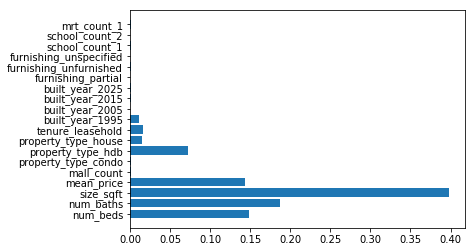

In [57]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
 
num_list = [1.5,0.6,7.8,6]
plt.barh(feature_list, regressor.feature_importances_)
plt.show()

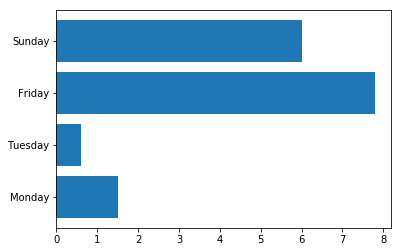

In [55]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
 
name_list = ['Monday','Tuesday','Friday','Sunday']
num_list = [1.5,0.6,7.8,6]
plt.barh(range(len(num_list)), num_list,tick_label = name_list)
plt.show()

In [7]:
# 训练ada_boost解决回归问题
def ada_boost_result(params):
    base_estimator = DecisionTreeRegressor()
    estimator = AdaBoostRegressor(base_estimator=base_estimator)
    # print(estimator.get_params().keys())
    model = GridSearchCV(estimator, params, scoring="neg_root_mean_squared_error")
    model.fit(X_train, y_train)
    # Store the parameters of the best model
    best_params, best_score = model.best_params_, model.best_score_
    # Predict class labels of test data on the model with the best found parameters
    y_pred = model.predict(X_test)

    print('Best AdaBoost (with DecisionTreeRegressor) regressor params: {}, score:{}'.format(best_params, best_score))
    return y_pred, model

In [7]:
# 训练ExtraTrees解决回归问题
def extra_trees_result(param_grid):
    estimator = ExtraTreesRegressor()
    model = GridSearchCV(estimator, param_grid, scoring="neg_root_mean_squared_error")
    # print(estimator.get_params().keys())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Best RandomForestRegressor regressor: {}'.format(model.best_params_))

    return y_pred, model

In [46]:
param_grid = {'n_estimators': [50, 65, 70, 75, 80], 'min_samples_split': [2, 4, 5, 7, 9, 15, 25], 'max_features' : ["auto", "sqrt", "log2"]}
y_pred, model = extra_trees_result(param_grid=param_grid)
print(y_pred.shape, y_pred)
print(model.best_score_)
out_file = "data/result_random_forest.csv"
save_pred(y_pred, out_file)


Best RandomForestRegressor regressor: {'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 70}
(6966,) [1163085.         1493982.85714286 1336921.28571429 ... 3548427.27272727
  542499.76190476 4531800.        ]
-129568805.91036208


In [8]:
# params = {'base_estimator__max_depth':[10, 20, 30, 40, 50], "n_estimators": [80, 100, 120, 140], "learning_rate": [ 0.05, 0.1, 0.5, 1]}
params = {'base_estimator__max_depth':[10, 20, 50, 100, 200], "n_estimators": [10, 20, 40, 50, 60, 80], "learning_rate": [0.1, 0.25, 0.5, 0.75, 1, 1.2]}
y_pred_ada, model = ada_boost_result(params)
# print(y_pred_ada.shape, y_pred_ada)
# out_file = "data/result_ada_boost.csv"
# save_pred(y_pred_ada, out_file)

Best AdaBoost (with DecisionTreeRegressor) regressor params: {'base_estimator__max_depth': 10, 'learning_rate': 1.2, 'n_estimators': 50}, score:-130043100.74710019


In [10]:
y_train_pred = model.predict(X_train)
rmse(y_train, y_train_pred)

6443687.570761388

In [9]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [12]:
y_train_pred.shape

(19168,)

In [13]:
2152109*3

6456327

In [15]:
6204624*3

18613872